## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from tensorflow.keras.layers import Dense, Dropout

def build_mlp(x_shape, num_classes):
 
    model = keras.models.Sequential()
    model.add(Dense(512, input_shape=(3072,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
MOMENTUM = [0.3, 0.6, 0.9]
EPOCH = 50
BATCH_SIZE = 256
NUM_CLASSES = 10
NESTOROV = [True, False]

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    for nes in NESTOROV:
        keras.backend.clear_session()
        print('experiment with momentum = %.6f, nestorov = '%momentum, nes)
        model = build_mlp(x_train.shape[1:], NUM_CLASSES)
        model.summary()
        optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=momentum, nesterov=nes)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE,  validation_split=0.2)
        
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        exp_name_tag = 'exp-mom-%s-nes-%s' % (str(momentum), str(nes))
            
        results[exp_name_tag] = {'train-acc' : train_acc,
                                'valid-acc' : val_acc,
                                'train-loss' : train_loss, 
                                'valid-loss' : val_loss}


experiment with momentum = 0.300000, nestorov =  True
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable pa

40000/40000 [==============================] - 1s 25us/sample - loss: 1.2582 - accuracy: 0.5518 - val_loss: 1.5456 - val_accuracy: 0.4537
Epoch 48/50
40000/40000 [==============================] - 1s 25us/sample - loss: 1.2544 - accuracy: 0.5568 - val_loss: 1.4612 - val_accuracy: 0.4913
Epoch 49/50
40000/40000 [==============================] - 1s 24us/sample - loss: 1.2395 - accuracy: 0.5591 - val_loss: 1.5124 - val_accuracy: 0.4711
Epoch 50/50
40000/40000 [==============================] - 1s 26us/sample - loss: 1.2324 - accuracy: 0.5607 - val_loss: 1.4944 - val_accuracy: 0.4789
experiment with momentum = 0.300000, nestorov =  False
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_______

40000/40000 [==============================] - 1s 35us/sample - loss: 1.2589 - accuracy: 0.5523 - val_loss: 1.4385 - val_accuracy: 0.4945
Epoch 44/50
40000/40000 [==============================] - 1s 35us/sample - loss: 1.2500 - accuracy: 0.5573 - val_loss: 1.4054 - val_accuracy: 0.5064
Epoch 45/50
40000/40000 [==============================] - 2s 41us/sample - loss: 1.2503 - accuracy: 0.5581 - val_loss: 1.5258 - val_accuracy: 0.4715
Epoch 46/50
40000/40000 [==============================] - 2s 45us/sample - loss: 1.2319 - accuracy: 0.5651 - val_loss: 1.3885 - val_accuracy: 0.5143
Epoch 47/50
40000/40000 [==============================] - 1s 34us/sample - loss: 1.2259 - accuracy: 0.5651 - val_loss: 1.4844 - val_accuracy: 0.4840
Epoch 48/50
40000/40000 [==============================] - 1s 33us/sample - loss: 1.2179 - accuracy: 0.5691 - val_loss: 1.4004 - val_accuracy: 0.5122
Epoch 49/50
40000/40000 [==============================] - 1s 30us/sample - loss: 1.2168 - accuracy: 0.5678 - va

40000/40000 [==============================] - 1s 35us/sample - loss: 1.2044 - accuracy: 0.5725 - val_loss: 1.5256 - val_accuracy: 0.4837
Epoch 40/50
40000/40000 [==============================] - 1s 37us/sample - loss: 1.2023 - accuracy: 0.5727 - val_loss: 1.4066 - val_accuracy: 0.5157
Epoch 41/50
40000/40000 [==============================] - 1s 35us/sample - loss: 1.1901 - accuracy: 0.5780 - val_loss: 1.4552 - val_accuracy: 0.5073
Epoch 42/50
40000/40000 [==============================] - 2s 40us/sample - loss: 1.1830 - accuracy: 0.5807 - val_loss: 1.4513 - val_accuracy: 0.4959
Epoch 43/50
40000/40000 [==============================] - 1s 35us/sample - loss: 1.1641 - accuracy: 0.5868 - val_loss: 1.5218 - val_accuracy: 0.4856
Epoch 44/50
40000/40000 [==============================] - 2s 42us/sample - loss: 1.1626 - accuracy: 0.5844 - val_loss: 1.4840 - val_accuracy: 0.4857
Epoch 45/50
40000/40000 [==============================] - 2s 43us/sample - loss: 1.1579 - accuracy: 0.5890 - va

40000/40000 [==============================] - 2s 39us/sample - loss: 1.2179 - accuracy: 0.5665 - val_loss: 1.4034 - val_accuracy: 0.5026
Epoch 36/50
40000/40000 [==============================] - 1s 36us/sample - loss: 1.2040 - accuracy: 0.5725 - val_loss: 1.4047 - val_accuracy: 0.4981
Epoch 37/50
40000/40000 [==============================] - 1s 32us/sample - loss: 1.2019 - accuracy: 0.5717 - val_loss: 1.4568 - val_accuracy: 0.4893
Epoch 38/50
40000/40000 [==============================] - 1s 34us/sample - loss: 1.1990 - accuracy: 0.5729 - val_loss: 1.4637 - val_accuracy: 0.4909
Epoch 39/50
40000/40000 [==============================] - 2s 41us/sample - loss: 1.1838 - accuracy: 0.5785 - val_loss: 1.4177 - val_accuracy: 0.5029
Epoch 40/50
40000/40000 [==============================] - 1s 32us/sample - loss: 1.1738 - accuracy: 0.5821 - val_loss: 1.5444 - val_accuracy: 0.4719
Epoch 41/50
40000/40000 [==============================] - 1s 33us/sample - loss: 1.1612 - accuracy: 0.5894 - va

40000/40000 [==============================] - 1s 37us/sample - loss: 1.1273 - accuracy: 0.5970 - val_loss: 1.4406 - val_accuracy: 0.5078
Epoch 32/50
40000/40000 [==============================] - 1s 37us/sample - loss: 1.1203 - accuracy: 0.5982 - val_loss: 1.3680 - val_accuracy: 0.5229
Epoch 33/50
40000/40000 [==============================] - 2s 41us/sample - loss: 1.1095 - accuracy: 0.6024 - val_loss: 1.4239 - val_accuracy: 0.5122
Epoch 34/50
40000/40000 [==============================] - 2s 38us/sample - loss: 1.0945 - accuracy: 0.6087 - val_loss: 1.3852 - val_accuracy: 0.5183
Epoch 35/50
40000/40000 [==============================] - 1s 35us/sample - loss: 1.0847 - accuracy: 0.6101 - val_loss: 1.3741 - val_accuracy: 0.5284
Epoch 36/50
40000/40000 [==============================] - 1s 32us/sample - loss: 1.0747 - accuracy: 0.6130 - val_loss: 1.3676 - val_accuracy: 0.5351
Epoch 37/50
40000/40000 [==============================] - 1s 33us/sample - loss: 1.0578 - accuracy: 0.6200 - va

40000/40000 [==============================] - 1s 35us/sample - loss: 1.2614 - accuracy: 0.5485 - val_loss: 1.4169 - val_accuracy: 0.5008
Epoch 28/50
40000/40000 [==============================] - 2s 38us/sample - loss: 1.2437 - accuracy: 0.5532 - val_loss: 1.3865 - val_accuracy: 0.5129
Epoch 29/50
40000/40000 [==============================] - 2s 43us/sample - loss: 1.2391 - accuracy: 0.5576 - val_loss: 1.3917 - val_accuracy: 0.5048
Epoch 30/50
40000/40000 [==============================] - 1s 34us/sample - loss: 1.2160 - accuracy: 0.5613 - val_loss: 1.3772 - val_accuracy: 0.5150
Epoch 31/50
40000/40000 [==============================] - 1s 34us/sample - loss: 1.2086 - accuracy: 0.5659 - val_loss: 1.3633 - val_accuracy: 0.5274
Epoch 32/50
40000/40000 [==============================] - 1s 32us/sample - loss: 1.1971 - accuracy: 0.5683 - val_loss: 1.4045 - val_accuracy: 0.5110
Epoch 33/50
40000/40000 [==============================] - 1s 35us/sample - loss: 1.1848 - accuracy: 0.5753 - va

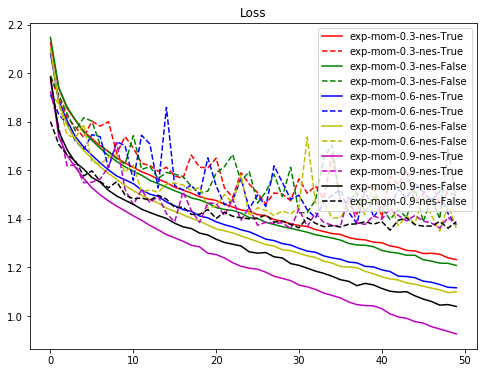

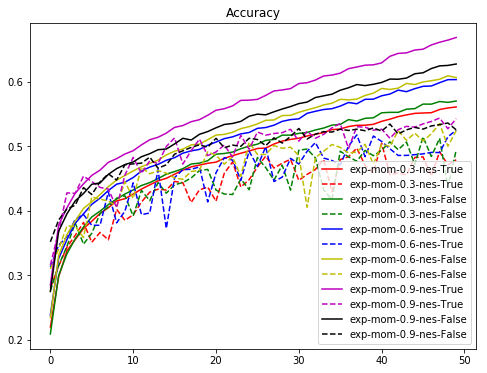

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()